# Predicting Economic Inflection Points

### Mitchell Gabalski, Colin Bare, Filip Jevtic

### The Problem:

The economy is one of the most researched topics in the world because it directly affects many facets of life. It is interesting because using various economic indicators, researchers attempt to predict fluctuations in the overall economy of a nation to prevent disasters such as the 2008 crisis and the Great Depression, with jobs and lives on the line. As students in a computational modeling class, we made it our mission to use various indicators to determine if we could model the past economy of the United States. 

### Data
As indicators, we used data from two different industrial stock averages: the SNP 500 and the Dow Jones. While the Dow Jones represents 30 large corporations, the SNP represents 500. Additionally, we used the daily treasury yield curve rate data after researching that it is often used to predict recessions. We also read that the trend is found by observing changes in the short and long term yield rates. Since the least amount of NA data existed for 1 Month and 20 Year rates, we chose those as the variables for the yield curve indicator. The reason we used these three was they all had plenty of data and at least 20 years worth, which is important in making sure the model is accurate as possible. As a target variable to measure weather the economy is in recession, constant, or boom, we found quarterly GDP data up till 2017 that dates back to 1947. We preferred quarterly over yearly data since GDP fluctuations can occur at many points throughout a year, so forming more data points would only increase accuracy of the model. We determined that since GDP represents the total market value of all finals goods and services in the nation's economy, it would be best to use it as the variable that we try to model our indicators after, and use it to determine how accurate our model is.

Dow Jones: https://finance.yahoo.com/quote/%5EDJI/history/

SNP 500: https://finance.yahoo.com/quote/%5EGSPC/history?p=%5EGSPC

Yield Curve Treasury Rates: https://www.treasury.gov/resource-center/data-chart-center/interest-rates/pages/textview.aspx?data=yield (Copied to excel, saved to csv)


### The Model
After much experimentation, we decided that altering the GDP data to classify each point as a recession, boom, or constant economy would be done in order to use kNN modeling to form a predictive model that took the indicators as inputs. A recession is signaled by a negative change in GDP over a quarter, which made using the quarterly GDP data ideal. A boom is an increase in GDP. We would test the acccuracy by comparing the predicted GDP classification to the actual classification.

### Results

The first thing we did was load up data for Dow Jones, SNP 500, and yield curve treasury rates into dataframes from various years until 2020. The quarterly GDP data was also loaded into a dataframe, which goes until 2017. All unnecessary columns were dropped. Since data for the Quarterly GDP goes until 2017, we decided to use the data from 2018 - 2020 as data we would conduct future predictions on after forming our model.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
dow_jones = pd.read_csv('^DJI.csv')
dow_jones = dow_jones.drop(["High","Low","Adj Close","Volume"],axis = 1)
dow_jones



,Date,Open,Close
0,1985-01-29,1277.719971,1292.619995
1,1985-01-30,1297.369995,1287.880005
2,1985-01-31,1283.239990,1286.770020
3,1985-02-01,1276.939941,1277.719971
4,1985-02-04,1272.079956,1290.079956
...,...,...,...
8867,2020-04-03,21285.929688,21052.529297
8868,2020-04-06,21693.630859,22679.990234
8869,2020-04-07,23537.439453,22653.859375
8870,2020-04-08,22893.470703,23433.570313


In [7]:
bad_rows = []
for row_ind,row in dow_jones.iterrows():
    year = row[0][2:4]
    if(float(year) < 18) or (float(year) > 20):
        bad_rows.append(row_ind)
dow_predict_df = dow_jones.drop(bad_rows,axis = 0)
dow_predict_df = np.array(dow_predict_df)
dow_time_predict = dow_predict_df[:,0]
dow_open_predict = dow_predict_df[:,1].astype(np.float)
dow_open_predict = dow_open_predict.reshape(-1,1)

In [8]:
snp_500 = pd.read_csv('^GSPC.csv')
snp_500 = snp_500.drop(["High","Low","Adj Close","Volume"],axis = 1)
snp_500



,Date,Open,Close
0,1927-12-30,17.660000,17.660000
1,1928-01-03,17.760000,17.760000
2,1928-01-04,17.719999,17.719999
3,1928-01-05,17.549999,17.549999
4,1928-01-06,17.660000,17.660000
...,...,...,...
23173,2020-04-03,2514.919922,2488.649902
23174,2020-04-06,2578.280029,2663.679932
23175,2020-04-07,2738.649902,2659.409912
23176,2020-04-08,2685.000000,2749.979980


In [9]:
bad_rows = []
for row_ind,row in snp_500.iterrows():
    year = row[0][2:4]
    if(float(year) < 18) or (float(year) > 20):
        bad_rows.append(row_ind)
snp_predict_df = snp_500.drop(bad_rows,axis = 0)
snp_predict_df = np.array(snp_predict_df)
snp_time_predict = snp_predict_df[:,0]
snp_open_predict = snp_predict_df[:,1].astype(np.float)
snp_open_predict = snp_open_predict.reshape(-1,1)

In [10]:
quarter_gdp = pd.read_csv('quarter_csv.csv')
quarter_gdp = quarter_gdp.drop(["level-chained","change-current","change-chained"],axis = 1)
quarter_gdp

,date,level-current
0,1947-04-01,246.3
1,1947-07-01,250.1
2,1947-10-01,260.3
3,1948-01-01,266.2
4,1948-04-01,272.9
...,...,...
276,2016-04-01,18538.0
277,2016-07-01,18729.1
278,2016-10-01,18905.5
279,2017-01-01,19057.7


In [15]:

yield_curve = pd.read_csv('yeild_curve_data - Sheet1 (1).csv')

yield_curve = yield_curve.drop(["2 Mo","3 Mo","6 Mo","1 Yr","2 Yr","3 Yr","5 Yr","7 Yr","10 Yr","30 Yr"],axis = 1)
yield_curve = yield_curve.dropna()
yield_curve


,Date,1 Mo,20 Yr
396,07/31/01,3.67,5.61
397,08/01/01,3.65,5.63
398,08/02/01,3.65,5.68
399,08/03/01,3.63,5.70
400,08/06/01,3.62,5.70
...,...,...,...
5068,04/06/20,0.09,1.08
5069,04/07/20,0.10,1.13
5070,04/08/20,0.14,1.18
5071,04/09/20,0.20,1.15


In [16]:
bad_rows = []
for row_ind,row in yield_curve.iterrows():
    year = row[0][6:]
    year = "20" + year
    if(float(year) < 2018) or (float(year) > 2020):
        bad_rows.append(row_ind)
yield_predict_df = yield_curve.drop(bad_rows,axis = 0)
yield_predict_df = np.array(yield_predict_df)
yield_time_predict =yield_predict_df[:,0]
yield_onemonth_predict = yield_predict_df[:,1]
yield_twentyyear_predict = yield_predict_df[:,2]
yield_combined_predict = np.stack((yield_onemonth_predict,yield_twentyyear_predict),axis = -1)

Here we created an array for all the Dow Jones data that occurs in the months included by the GDP data, with gdp data. We then separated the variables of the array for plotting and modeling. The data had to be converted to floats too, as everything was a np string.  We made an array of 0,1, and 2's representing changes in the gdp. When gdp was constant, a 1 was appended. When it decreased, a 0 was appended, and when it increased, a 2 was appended. Since the data was dependent on time, then train test split could not be used. Instead we separated the first 25% of the data to be test data, and the rest was considered training data. We then used the KNeighbors classifier with a number neighbors value of 2 to predict either 0,1, or 2. Accuracy was calculated too.

In [14]:

dow_list = []

for row_ind,row in dow_jones.iterrows():
    string_month = row[0][5:7]
    string_year = row[0][2:4]
    for row_ind2,row2 in quarter_gdp.iterrows():

        string2_month = row2[0][5:7]
        string2_year = row2[0][2:4]
        if(string2_month == string_month) and (string_year == string2_year):
            row_tup = (row[0],row[1],row[2],row2[1])
            dow_list.append(row_tup)
dow_arr = np.array(dow_list)



In [222]:
from sklearn.model_selection import train_test_split
time = dow_arr[:,0]
open_prices = dow_arr[:,1]
dow_gdp = dow_arr[:,3]
dow_gdp = dow_gdp.astype(np.float)
dow_gdp.reshape(-1,1)
open_prices = open_prices.astype(np.float)
open_prices = open_prices.reshape(-1,1)


In [268]:
gdp_binary = []

for i in range(len(dow_gdp)): 
    if(i < len(dow_gdp)-1 and i > 0):
   
        if(dow_gdp[i+1] < dow_gdp[i]):
            gdp_binary.append(0)
        elif(dow_gdp[i+1] == dow_gdp[i]):
            gdp_binary.append(1)
        elif(dow_gdp[i+1] > dow_gdp[i]):
            gdp_binary.append(2)
    else:
        gdp_binary.append(1)
gdp_classifier = gdp_binary      


2729

In [271]:
dow_split = int(len(gdp_classifier)/4)
dow_train = open_prices[dow_split:len(gdp_classifier)]
gdp_train = gdp_classifier[dow_split:len(gdp_classifier)]
dow_test = open_prices[0:dow_split]
gdp_test = gdp_classifier[0:dow_split]


In [272]:
from sklearn.neighbors import KNeighborsClassifier

#dow_train,dow_test,gdp_train,gdp_test = train_test_split(open_prices,gdp_classifier,test_size = 0.3)
model = KNeighborsClassifier(n_neighbors=2)
model.fit(dow_train,gdp_train)
prediction = model.predict(dow_test)
prediction


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [274]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(gdp_test,prediction)
print(accuracy)

0.9530791788856305


Basic plot of Dow Jones and GDP over time to show the data we are working with.

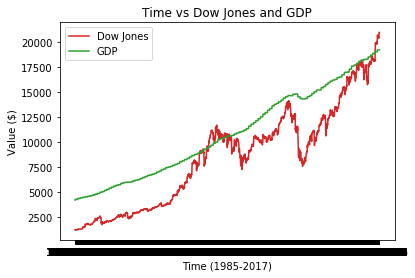

In [286]:
plt.plot(time,open_prices,color = 'tab:red')
plt.xlabel("Time (1985-2017)")
plt.ylabel("Value ($)")
plt.title("Time vs Dow Jones and GDP")
plt.plot(time,dow_gdp,color = 'tab:green')
plt.legend(["Dow Jones","GDP"])

Here, we ran the model over both training and testing data to visualize the model's effectiveness. The GDP and Dow Jones data was plotted alongside the predictions. By filtering through the predictions and seeing the graph, it can be seen that there is a great concentration of zeroes around 2008, when the US's biggest recession occurred. This signifies that the model had validity to it.

In [276]:
dow_all_prediction = model.predict(open_prices)

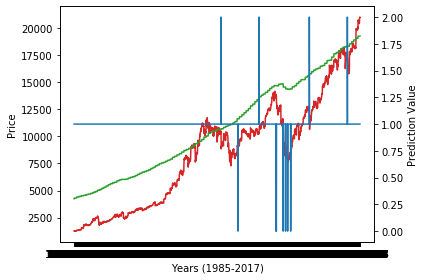

In [278]:
fig, ax1 = plt.subplots()
color = 'tab:red'
color2 = 'tab:green'
ax1.set_xlabel('Years (1985-2017)')
ax1.set_ylabel('Price')
ax1.plot(time,open_prices, color=color)
ax1.plot(time,dow_gdp,color = color2)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Prediction Value')
ax2.plot(time,dow_all_prediction , color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()



In [281]:
plt.close()

In [284]:
recessions = []
booms = []
for i in range(len(dow_all_prediction)):
    if(dow_all_prediction[i] == 0):
        year = time[i]
        recessions.append(year)
    if(dow_all_prediction[i] == 2):
        year = time[i]
        booms.append(year)
print(recessions,booms)

['2003-07-15', '2007-10-29', '2007-10-31', '2008-07-31', '2008-10-31', '2009-01-30', '2009-07-13'] ['2001-07-31', '2005-10-31', '2011-07-29', '2015-10-30']


The last thing we did for the Dow Jones data was predict it over the data we had no GDP data for but did have Dow Jones data, from 2018-2020. What is seen is no significant recession or boom predicted, which is perfectly normal, since the sample size we predicted over was so small.

In [282]:
two_year_dow = model.predict(dow_open_predict)

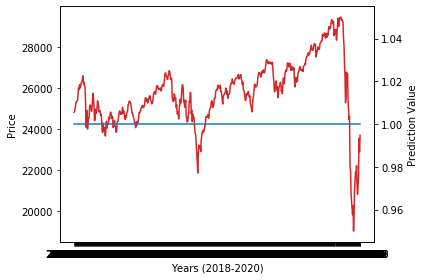

In [296]:
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('Years (2018-2020)')
ax1.set_ylabel('Price')
ax1.plot(dow_time_predict,dow_open_predict, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Prediction Value')
ax2.plot(dow_time_predict,two_year_dow , color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()
plt.close()


Here we created an array for all the SNP 500 data that occurs in the months included by the GDP data, with gdp data. We then separated the variables of the array for plotting and modeling. The data had to be converted to floats too, as everything was a np string.  We made an array of 0,1, and 2's representing changes in the gdp. When gdp was constant, a 1 was appended. When it decreased, a 0 was appended, and when it increased, a 2 was appended. Since the data was dependent on time, then train test split could not be used. Instead we separated the first 25% of the data to be test data, and the rest was considered training data. We then used the KNeighbors classifier with a number neighbors value of 2 to predict either 0,1, or 2. Accuracy was calculated too.

In [24]:
snp_list = []

for row_ind,row in snp_500.iterrows():
    string_month = row[0][5:7]
    string_year = row[0][2:4]
    for row_ind2,row2 in quarter_gdp.iterrows():
        string2_month = row2[0][5:7]
        string2_year = row2[0][2:4]
        if(string2_month == string_month) and (string_year == string2_year):
            row_tup = (row[0],row[1],row[2],row2[1])
            snp_list.append(row_tup)
snp_arr = np.array(snp_list)
snp_arr.shape

(5943, 4)

In [333]:
time = snp_arr[:,0]
open_prices = snp_arr[:,1]
snp_gdp = snp_arr[:,3].astype(np.float)
snp_gdp = snp_gdp.reshape(-1,1)
open_prices = open_prices.astype(np.float)
open_prices = open_prices.reshape(-1,1)

In [334]:
gdp_binary = []

for i in range(len(snp_gdp)):

    if(i < len(snp_gdp)-1):
   
        if(snp_gdp[i+1] < snp_gdp[i]):
            gdp_binary.append(0)
        elif(snp_gdp[i+1] == snp_gdp[i]):
            gdp_binary.append(1)
        elif(snp_gdp[i+1] > snp_gdp[i]):
            gdp_binary.append(2)
    else:
        gdp_binary.append(1)
gdp_classifier = gdp_binary  

In [335]:
snp_split = int(len(gdp_classifier)/4)
snp_train = open_prices[snp_split:len(gdp_classifier)]
gdp_train = gdp_classifier[snp_split:len(gdp_classifier)]
snp_test = open_prices[0:dow_split]
gdp_test = gdp_classifier[0:dow_split]

In [336]:
from sklearn.neighbors import KNeighborsClassifier

#snp_train,snp_test,gdp_train,gdp_test = train_test_split(open_prices,gdp_classifier,test_size = 0.3)
model = KNeighborsClassifier(n_neighbors=2)
model.fit(snp_train,gdp_train)
prediction = model.predict(snp_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [337]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(gdp_test,prediction)
print(accuracy)

0.9530791788856305


Basic plot of Dow Jones and GDP over time to show the data we are working with.

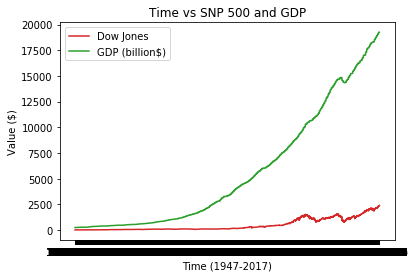

In [338]:
plt.plot(time,open_prices,color = 'tab:red')
plt.xlabel("Time (1947-2017)")
plt.ylabel("Value ($)")
plt.title("Time vs SNP 500 and GDP")
plt.plot(time,snp_gdp,color = 'tab:green')
plt.legend(["Dow Jones","GDP (billion$)"])

Here, we ran the model over both training and testing data to visualize the model's effectiveness. The GDP and SNP 500 data was plotted alongside the predictions. By filtering through the predictions and seeing the graph, it can be seen that there is a great concentration of zeroes around 2008, along with additional booms and recessions, when the US's biggest recession occurred. This signifies that the model had validity to it. Like the Dow Jones, the date 10-31-2020 stands out as a recession date in this model too.

In [300]:
snp_all_prediction = model.predict(open_prices)

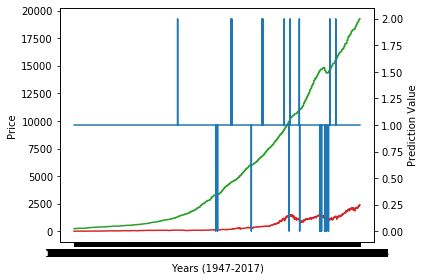

In [301]:
fig, ax1 = plt.subplots()
color = 'tab:red'
color2 = 'tab:green'
ax1.set_xlabel('Years (1947-2017)')
ax1.set_ylabel('Price')
ax1.plot(time,open_prices, color=color)
ax1.plot(time,snp_gdp,color = color2)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Prediction Value')
ax2.plot(time,snp_all_prediction , color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()
plt.close()


In [303]:
recessions = []
booms = []
for i in range(len(snp_all_prediction)):
    if(snp_all_prediction[i] == 0):
        year = time[i]
        recessions.append(year)
    if(snp_all_prediction[i] == 2):
        year = time[i]
        booms.append(year)
print(recessions,booms)

['1981-10-30', '1982-04-27', '1990-07-31', '1999-10-27', '2002-07-10', '2007-07-10', '2007-07-23', '2007-10-31', '2008-07-31', '2008-10-31', '2009-01-28', '2009-01-30', '2009-07-22'] ['1972-07-31', '1985-07-31', '1985-10-31', '1993-01-29', '1993-04-30', '1998-07-31', '2000-01-31', '2002-04-30', '2009-10-30', '2011-04-29']


The last thing we did for the SNP 500 data was predict it over the data we had no GDP data for but did have SNP 500 data, from 2018-2020. What is seen is no significant recession or boom predicted, which is perfectly normal, since the sample size we predicted over was so small, much like the Dow Jones model.

In [304]:
two_year_snp = model.predict(snp_open_predict)

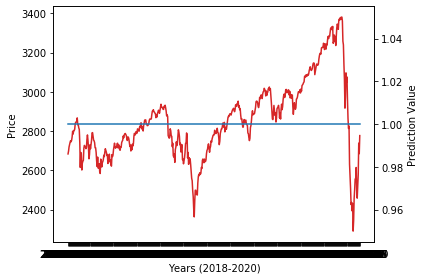

In [305]:
fig, ax1 = plt.subplots()
color = 'tab:red'

ax1.set_xlabel('Years (2018-2020)')
ax1.set_ylabel('Price')
ax1.plot(snp_time_predict,snp_open_predict, color=color)
ax1.tick_params(axis='y')

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Prediction Value')
ax2.plot(snp_time_predict,two_year_snp , color=color)
ax2.tick_params(axis='y')

fig.tight_layout()
plt.show()
plt.close()


Last, we created an array for all the yield curve data that occurs in the months included by the GDP data, with gdp data. We then separated the variables of the array for plotting and modeling. The data had to be converted to floats too, as everything was a np string.  We made an array of 0,1, and 2's representing changes in the gdp. When gdp was constant, a 1 was appended. When it decreased, a 0 was appended, and when it increased, a 2 was appended. Since the data was dependent on time, then train test split could not be used. Instead we separated the first 25% of the data to be test data, and the rest was considered training data. We then used the KNeighbors classifier with a number neighbors value of 2 to predict either 0,1, or 2. Accuracy was calculated too. What was unique about the yield curve data was that we had to make an array of tuples, where each tuple had a 1 month and corresponding 20 year rate in it.

In [32]:
yield_list = []

for row_ind, row in yield_curve.iterrows():
    string_month = row[0][0:2]
    string_year = row[0][6:8]
    for row_ind2,row2 in quarter_gdp.iterrows():
        string2_month = row2[0][5:7]
        string2_year = row2[0][2:4]
        if(string2_month == string_month) and (string_year == string2_year):
            row_list = []
            for item in row:
                row_list.append(item)
            row_list.append(row2[1])
            yield_list.append(row_list)
yield_arr = np.array(yield_list)
yield_arr.shape

(1317, 4)

In [309]:
time = yield_arr[:,0]
one_mo = yield_arr[:,1].astype(np.float)
twenty_year = yield_arr[:,2].astype(np.float)
yield_gdp = yield_arr[:,3].astype(np.float)
yield_gdp = yield_gdp.reshape(-1,1)
all_yield = np.stack((one_mo,twenty_year),axis = -1)

In [310]:
gdp_binary = []

for i in range(len(yield_gdp)):

    if(i < len(yield_gdp)-1):
   
        if(yield_gdp[i+1] < yield_gdp[i]):
            gdp_binary.append(0)
        elif(yield_gdp[i+1] == yield_gdp[i]):
            gdp_binary.append(1)
        elif(yield_gdp[i+1] > yield_gdp[i]):
            gdp_binary.append(2)
    else:
        gdp_binary.append(1)
gdp_classifier = gdp_binary  

In [311]:
yield_split = int(len(gdp_classifier)/4)
yield_train = all_yield[yield_split:len(gdp_classifier)]
gdp_train = gdp_classifier[yield_split:len(gdp_classifier)]
yield_test = all_yield[0:yield_split]
gdp_test = gdp_classifier[0:yield_split]


In [312]:
from sklearn.neighbors import KNeighborsClassifier

#yield_train,yield_test,gdp_train,gdp_test = train_test_split(all_yield,gdp_classifier,test_size = 0.3)
model = KNeighborsClassifier(n_neighbors=2)
model.fit(yield_train,gdp_train)
prediction = model.predict(yield_test)
prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [313]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(gdp_test,prediction)
print(accuracy)

0.9513677811550152


Basic plot of 1 month rate, 20 year rate, and GDP over time to show the data we are working with.

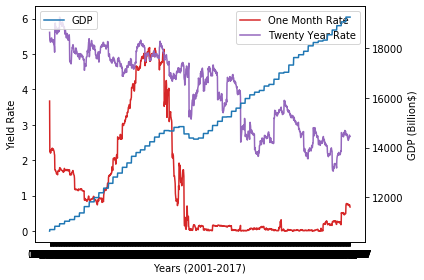

In [327]:
fig, ax1 = plt.subplots()
color = 'tab:red'
color2 = 'tab:purple'
ax1.set_xlabel('Years (2001-2017)')
ax1.set_ylabel('Yield Rate')
ax1.plot(time,all_yield[:,0], color=color,label = "One Month Rate")
ax1.plot(time,all_yield[:,1],color=color2,label = "Twenty Year Rate")
ax1.tick_params(axis='y')
ax1.legend()

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('GDP (Billion$)')
ax2.plot(time,yield_gdp , color=color,label = "GDP")
ax2.tick_params(axis='y')
ax2.legend()

fig.tight_layout()
plt.show()
plt.close()

Here, we ran the model over both training and testing data to visualize the model's effectiveness. The GDP, 1 month rate, and 20 year rate data was plotted alongside the predictions. By filtering through the predictions and seeing the graph, it can be seen that there is a great concentration of zeroes around 2008, however with no booms and all recessions occuring close to 2008, when the US's biggest recent recession occurred.This signifies that the model had validity to it. Like the other two models, the date 10-31-2020 stands out as a recession date in this model too. What is interesting is that the yield curve seems to be only be able to predict recessions, which is what it said in written research online too (https://theconversation.com/the-yield-curve-is-one-of-the-most-accurate-predictors-of-a-future-recession-and-its-flashing-warning-signs-119963)

In [322]:
yield_all_prediction = model.predict(all_yield)


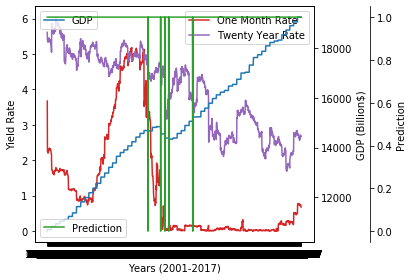

In [328]:
fig, ax1 = plt.subplots()
color = 'tab:red'
color2 = 'tab:purple'
ax1.set_xlabel('Years (2001-2017)')
ax1.set_ylabel('Yield Rate')
ax1.plot(time,all_yield[:,0], color=color,label = "One Month Rate")
ax1.plot(time,all_yield[:,1],color=color2,label = "Twenty Year Rate")
ax1.tick_params(axis='y')
ax1.legend()

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('GDP (Billion$)')
ax2.plot(time,yield_gdp , color=color,label = "GDP")
ax2.legend()


ax3 = ax1.twinx()
ax3.spines["right"].set_position(("axes", 1.2))
color = 'tab:green'
ax3.set_ylabel('Prediction')
ax3.plot(time,yield_all_prediction , color=color,label = "Prediction")
ax3.tick_params(axis='y')
ax3.legend()

fig.tight_layout()

plt.show()
plt.close()

In [340]:
recessions = []
booms = []
for i in range(len(yield_all_prediction)):
    if(yield_all_prediction[i] == 0):
        year = time[i]
        recessions.append(year)
    if(yield_all_prediction[i] == 2):
        year = time[i]
        booms.append(year)
print(recessions,booms)

['1953-04-28', '1954-01-28', '1954-04-30', '1954-07-29', '1956-01-30', '1956-01-31'] []


The last thing we did for the yield curve model was predict it over the data we had no GDP data for but did have yield curve data, from 2018-2020. What is seen is no significant recession or boom predicted, which is perfectly normal, since the sample size we predicted over was so small, much like the other two models. What is interesting is that the often mentioned overlap between the short term and long term rate occurs in 2020, which was mentioned in the above article as a warning sign to a future recession. That's especially interesting since the US is currently in a recession of its own due to the coronavirus. 

In [331]:
two_year_yield = model.predict(yield_combined_predict)

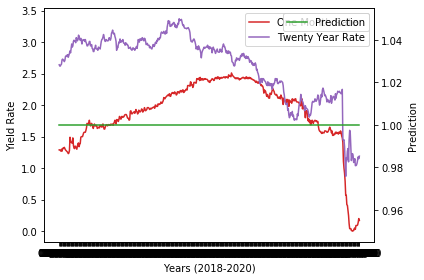

In [332]:
fig, ax1 = plt.subplots()
color = 'tab:red'
color2 = 'tab:purple'
ax1.set_xlabel('Years (2018-2020)')
ax1.set_ylabel('Yield Rate')
ax1.plot(yield_time_predict,yield_combined_predict[:,0], color=color,label = "One Month Rate")
ax1.plot(yield_time_predict,yield_combined_predict[:,1],color=color2,label = "Twenty Year Rate")
ax1.tick_params(axis='y')
ax1.legend()

ax2 = ax1.twinx()

color = 'tab:green'
ax2.set_ylabel('Prediction')
ax2.plot(yield_time_predict,two_year_yield, color=color,label = "Prediction")
ax2.tick_params(axis='y')
ax2.legend()

fig.tight_layout()
plt.show()
plt.close()

### Conclusions

Overall, we believe we created an impressive model. Just by being able to have modeled the 2008 crisis shows that the model works to a certain degree. The yield curve proved that it could only predict recessions and since it relies on two arrays of data as opposed to the stock index data that only relies on a single array, the yield curve is likely a more accurate determinant of recessions than the other two indicators. The SNP 500 data seemed to be the best predictor of booms, particularly because it encompassed the market value of 500 companies, which is a broader representation of the economy than the Dow Jones Index.

Some things we'd change or do differently is maybe alter how we predicted the economy. Using a classifier is helpful but it made prediction of a recession or boom very finite, there was no in between 0 and 1 and 2. Another thing that we'd change is determine how to predict future economic inflection points, and trying to determine how to rely on a model without any sort of input data required to do a prediction. In this case, we didn't need GDP data to predict from 2018-2020 but needed an indicator. By determining how to predict the indicator over future years and then using the model on that predicted indicator, we could forecast the next recession or boom, which would be huge because it could be used so the government and businesses can make the appropriate adjustements to form the best outcome.

Overall, though, we were satfisfied with the model.

